Regularization And Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('supershops.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [49]:
df = df.drop(['Area'], axis=1)

In [5]:
df.dropna(inplace=True)

In [6]:
x= df.drop(['Profit', 'Area'], axis=1)

In [10]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [11]:
y=df[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [8]:
df.Transport.mean()

np.float64(215331.7324489796)

In [9]:
df.Administration.mean()

np.float64(120688.11979591836)

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.75, random_state=0)

In [24]:
xtrain.shape

(36, 3)

In [25]:
xtest.shape

(13, 3)

In [27]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xtest,ytest, train_size=0.75, random_state=0)

In [28]:
xtrain2.shape

(9, 3)

In [29]:
xtest2.shape

(4, 3)

In [30]:
ytrain2.shape

(9, 1)

In [31]:
ytest2.shape

(4, 1)

In [20]:
xtrain.head()

,Marketing Spend,Administration,Transport
28,66051.52,182645.56,118148.20
49,0.00,116983.80,45173.06
2,153441.51,101145.55,407934.54
47,0.00,135426.92,0.00
18,91749.16,114175.79,294919.57


In [21]:
ytrain.head()

,Profit
28,103282.38
49,14681.40
2,191050.39
47,42559.73
18,124266.90


In [22]:
xtrain.corr()

,Marketing Spend,Administration,Transport
Marketing Spend,1.000000,0.236856,0.742155
Administration,0.236856,1.000000,0.036013
Transport,0.742155,0.036013,1.000000


In [ ]:
df.corr()

ValueError: could not convert string to float: 'Dhaka'

OLS

In [32]:
model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = model.predict(xtest)

In [34]:
y_pred

array([[ 90707.18524202],
       [166377.24276987],
       [124018.59727829],
       [ 93252.51801345],
       [ 97588.41924098],
       [ 68948.39245538],
       [ 89037.14295216],
       [ 73472.98068535],
       [159657.23912108],
       [129149.84623501],
       [128674.69774365],
       [ 88409.42998689],
       [ 96436.18820079]])

In [36]:
model.coef_

array([[0.63434285, 0.09110112, 0.09838741]])

In [37]:
model.intercept_

array([31880.21334994])

In [35]:
model.predict([[131242.33, 242342,6578544]])

array([[784456.36624159]])

In [41]:
y_pred = model.predict(xtest)
y_pred

array([[ 90707.18524202],
       [166377.24276987],
       [124018.59727829],
       [ 93252.51801345],
       [ 97588.41924098],
       [ 68948.39245538],
       [ 89037.14295216],
       [ 73472.98068535],
       [159657.23912108],
       [129149.84623501],
       [128674.69774365],
       [ 88409.42998689],
       [ 96436.18820079]])

In [39]:
ytest

,Profit
30,99937.59
4,166187.94
27,105008.31
31,97483.56
33,96778.92
38,81229.06
35,96479.51
41,77798.83
7,155752.60
10,146121.95


In [43]:
mse=mean_squared_error(ytest,y_pred)
print("MSE", mse)

MSE 101360809.28512502


In [ ]:
model.score(xtest,ytest) #test accuracy

0.8744319145336102

In [ ]:
model.score(xtrain,ytrain) #train accuracy

0.905033885280169

Polynomial

In [50]:
df.corr()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.227141,0.718574,0.937853
Administration,0.227141,1.000000,0.009534,0.197201
Transport,0.718574,0.009534,1.000000,0.782578
Profit,0.937853,0.197201,0.782578,1.000000


In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


Degree 2

In [75]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

In [76]:
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,114523.61,136897.80,471784.10,1.311566e+10,1.567803e+10,5.403042e+10,1.874101e+10,6.458621e+10,2.225802e+11,1.502052e+15,1.795505e+15,6.187759e+15,2.146288e+15,7.396645e+15,2.549069e+16,2.565603e+15,8.841709e+15,3.047074e+16,1.050098e+17
1,1.0,162597.70,151377.59,443898.53,2.643801e+10,2.461365e+10,7.217688e+10,2.291517e+10,6.719629e+10,1.970459e+11,4.298760e+15,4.002123e+15,1.173579e+16,3.725955e+15,1.092596e+16,3.203921e+16,3.468844e+15,1.017201e+16,2.982833e+16,8.746839e+16
2,1.0,153441.51,101145.55,407934.54,2.354430e+10,1.551993e+10,6.259409e+10,1.023042e+10,4.126076e+10,1.664106e+11,3.612672e+15,2.381401e+15,9.604532e+15,1.569771e+15,6.331114e+15,2.553429e+16,1.034762e+15,4.173343e+15,1.683169e+16,6.788463e+16
3,1.0,144372.41,118671.85,383199.62,2.084339e+10,1.713294e+10,5.532345e+10,1.408301e+10,4.547501e+10,1.468419e+11,3.009211e+15,2.473524e+15,7.987180e+15,2.033198e+15,6.565336e+15,2.119993e+16,1.671257e+15,5.396603e+15,1.742601e+16,5.626978e+16
4,1.0,142107.34,91391.77,366168.42,2.019450e+10,1.298744e+10,5.203522e+10,8.352456e+09,3.346478e+10,1.340793e+11,2.869786e+15,1.845611e+15,7.394587e+15,1.186945e+15,4.755591e+15,1.905365e+16,7.633457e+14,3.058405e+15,1.225375e+16,4.909561e+16


In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(x_poly,y, test_size=0.25,random_state=0)

In [78]:
xtrain.shape

(36, 20)

In [79]:
model2 = LinearRegression()
model2.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [80]:
y_pred2 = model2.predict(xtest)

In [81]:
y_pred2

array([[102764.31794053],
       [165223.98765131],
       [131085.79551998],
       [107292.65894794],
       [104937.4770637 ],
       [ 29252.89137386],
       [ 92119.46186505],
       [ 67962.45135824],
       [151537.76344626],
       [131673.50378322],
       [133380.85825586],
       [101835.48867288],
       [ 98575.29068725]])

In [82]:
mse = mean_squared_error(ytest,y_pred2)

In [83]:
print("MSE: ", mse)

MSE:  310521780.4038569


In [84]:
model2.score(xtest,ytest)

0.6153185265989274

In [85]:
model2.score(xtrain, ytrain)

0.965007998268618

Make Pipeline

In [86]:
from sklearn.pipeline import make_pipeline

In [87]:
pipeline = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

In [88]:
pipeline.fit(x,y)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,4
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [89]:
pipeline.predict(x)[0]

array([191459.91222934])

In [90]:
pipeline.predict([[84764.48,842983,94389]])

array([[-2.27809316e+08]])

In [91]:
nwx = poly.transform([[84764.48,842983,94389]])
nwx

array([[1.00000000e+00, 8.47644800e+04, 8.42983000e+05, 9.43890000e+04,
        7.18501707e+09, 7.14550156e+10, 8.00083450e+09, 7.10620338e+11,
        7.95683224e+10, 8.90928332e+09, 6.09034236e+14, 6.05684724e+15,
        6.78186576e+14, 6.02353635e+16, 6.74456747e+15, 7.55190768e+14,
        5.99040865e+17, 6.70747431e+16, 7.51037438e+15, 8.40938343e+14]])

In [92]:
model2.predict(nwx)

array([[1589638.54323174]])

Regularization

In [94]:
x= df.drop(['Profit'], axis=1)
y = df[['Profit']]

In [95]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=0)

In [96]:
xtrain.head()

,Marketing Spend,Administration,Transport
28,66051.52,182645.56,118148.20
49,0.00,116983.80,45173.06
2,153441.51,101145.55,407934.54
47,0.00,135426.92,0.00
18,91749.16,114175.79,294919.57


L1 Regularization with LR - Lasso

In [97]:
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


L2 Regularization with LR - Ridge

In [98]:
ridge_model = Ridge()
ridge_model.fit(xtrain,ytrain)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Performance

In [99]:
lasso_predictions = lasso_model.predict(xtest)
lasso_mse = mean_squared_error(ytest, lasso_predictions)

In [100]:
print('Lasso MSE: ', lasso_mse)

Lasso MSE:  101360808.35784699


In [101]:
ridge_predictions = ridge_model.predict(xtest)
ridge_mse = mean_squared_error(ytest, ridge_predictions)

In [102]:
print('Ridge MSE: ', ridge_mse)

Ridge MSE:  101360809.28872333


In [103]:
lasso_score = lasso_model.score(xtest, ytest)
lasso_score

0.8744319156823435

In [104]:
ridge_score = ridge_model.score(xtest,ytest)
ridge_score

0.8744319145291526

In [105]:
scores = [lasso_score, ridge_score]
models = ['Lasso', 'Ridge']

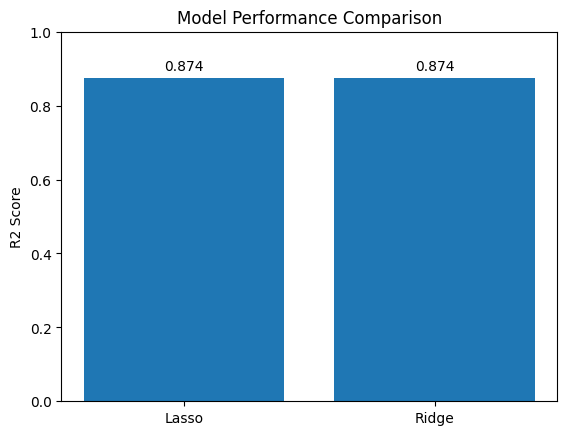

In [106]:
for i, score in enumerate(scores):
    plt.text(i, score+.02, f'{score:.3f}',ha='center')
plt.bar(models,scores)
plt.ylabel('R2 Score')
plt.title('Model Performance Comparison')
plt.ylim(0,1)
plt.show()